In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('/home/noise/Documentos/risk-credit/data/raw/loan_data_2007_2014.csv')

/tmp/ipykernel_36654/518985891.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/home/noise/Documentos/risk-credit/data/raw/loan_data_2007_2014.csv')


In [8]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Pre Processing-Date Variable

In [9]:
type(df['emp_length'][0])

str

In [10]:
def clean(value):
    if pd.isna(value):
        return 0
    elif '10+' in value:
        return 10
    elif '<' in value:
        return 0
    else:
        return float(value.split()[0])
    
df['emp_length_int'] = df['emp_length'].apply(clean)

In [11]:
df['emp_length_int'].unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7.])

In [12]:
type(df['emp_length_int'][0])

numpy.float64

In [13]:
type(df['earliest_cr_line'])

pandas.core.series.Series

In [14]:
df['earliest_cr_line_date'] = pd.to_datetime(df['earliest_cr_line'], format = '%b-%y')

In [15]:
type(df['earliest_cr_line'][0])

str

In [16]:
pd.to_datetime('2017-12-01') - df['earliest_cr_line_date'] 

0        12022 days
1         6819 days
2         5874 days
3         7974 days
4         8005 days
            ...    
466280    5358 days
466281    7488 days
466282    5844 days
466283    5417 days
466284    6513 days
Name: earliest_cr_line_date, Length: 466285, dtype: timedelta64[ns]

In [17]:
df['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01')-df['earliest_cr_line_date']) / np.timedelta64(1, 'm')))

In [18]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,earliest_cr_line_date,mths_since_earliest_cr_line
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1985-01-01,17311680.0
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1999-04-01,9819360.0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,2001-11-01,8458560.0
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1996-02-01,11482560.0
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1996-01-01,11527200.0


In [19]:
df['mths_since_earliest_cr_line'].describe()

count    4.662560e+05
mean     1.049688e+07
std      4.118916e+06
min     -2.682432e+07
25%      8.020800e+06
50%      9.864000e+06
75%      1.249344e+07
max      2.572704e+07
Name: mths_since_earliest_cr_line, dtype: float64

In [20]:
df.loc[:, ['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']][df['mths_since_earliest_cr_line'] < 0]

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-23536800.0
1770,Sep-68,2068-09-01,-26693280.0
2799,Sep-64,2064-09-01,-24589440.0
3282,Sep-67,2067-09-01,-26166240.0
3359,Feb-65,2065-02-01,-24809760.0
...,...,...,...
464003,Jan-68,2068-01-01,-26341920.0
464260,Jul-66,2066-07-01,-25551360.0
465100,Oct-67,2067-10-01,-26209440.0
465500,Sep-67,2067-09-01,-26166240.0


In [21]:
df['mths_since_earliest_cr_line'][df['mths_since_earliest_cr_line'] < 0] = df['mths_since_earliest_cr_line'].max()

/tmp/ipykernel_36654/3793766548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mths_since_earliest_cr_line'][df['mths_since_earliest_cr_line'] < 0] = df['mths_since_earliest_cr_line'].max()


In [22]:
min(df['mths_since_earliest_cr_line'])

3199680.0

In [23]:
def clean_term(value):
    if pd.isna(value):
        return 0
    elif ' 36 months' in value:
        return 36
    elif ' 60 months' in value:
        return 60
    else:
        return float(value.split()[0])

In [24]:
df['term_int'] = df['term'].apply(clean_term)

In [25]:
df['issue_d_date'] = pd.to_datetime(df['issue_d'], format = '%b-%y')

In [26]:
df['issue_d_date'].describe()

count                           466285
mean     2013-08-23 15:33:29.494623232
min                2007-06-01 00:00:00
25%                2013-03-01 00:00:00
50%                2014-01-01 00:00:00
75%                2014-07-01 00:00:00
max                2014-12-01 00:00:00
Name: issue_d_date, dtype: object

In [27]:
df['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01')-df['issue_d_date'])/np.timedelta64(1, 'm')))

In [28]:
df['mths_since_issue_d'].describe()

count    4.662850e+05
mean     2.246907e+06
std      6.284508e+05
min      1.578240e+06
25%      1.798560e+06
50%      2.059200e+06
75%      2.499840e+06
max      5.523840e+06
Name: mths_since_issue_d, dtype: float64

## Pre Processing-Dummie Variable

In [29]:
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,earliest_cr_line_date,mths_since_earliest_cr_line,term_int,issue_d_date,mths_since_issue_d
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,3.960090e+05,0.0,0.0,0.0,466285.000000,466256,4.662560e+05,466285.000000,466285,4.662850e+05
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,3.037909e+04,NaN,NaN,NaN,5.723307,1997-12-16 11:57:43.058920192,1.062411e+07,42.605334,2013-08-23 15:33:29.494623232,2.246907e+06
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,0.000000e+00,NaN,NaN,NaN,0.000000,1969-01-01 00:00:00,3.199680e+06,36.000000,2007-06-01 00:00:00,1.578240e+06
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,1.350000e+04,NaN,NaN,NaN,2.000000,1994-03-01 00:00:00,8.065440e+06,36.000000,2013-03-01 00:00:00,1.798560e+06
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,2.280000e+04,NaN,NaN,NaN,6.000000,1999-03-01 00:00:00,9.904320e+06,36.000000,2014-01-01 00:00:00,2.059200e+06
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,3.790000e+04,NaN,NaN,NaN,10.000000,2002-09-01 00:00:00,1.249344e+07,60.000000,2014-07-01 00:00:00,2.499840e+06
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,9.999999e+06,NaN,NaN,NaN,10.000000,2068-12-01 00:00:00,2.572704e+07,60.000000,2014-12-01 00:00:00,5.523840e+06
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,3.724713e+04,NaN,NaN,NaN,3.756084,NaN,3.789539e+06,10.719040,NaN,6.284508e+05


In [30]:
threshold = 10
categorical_columns = [col for col in df.select_dtypes(include=['object', 'category']).columns if df[col].nunique() < threshold]
print("Variáveis categóricas confirmadas:", categorical_columns)


Variáveis categóricas confirmadas: ['term', 'grade', 'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan', 'initial_list_status', 'application_type']


In [31]:
df_dummies = [
    pd.get_dummies(df['grade'], prefix='grade', prefix_sep=':'),
    pd.get_dummies(df['sub_grade'], prefix='sub_grade', prefix_sep=':'),
    pd.get_dummies(df['home_ownership'], prefix='home_ownership', prefix_sep=':'),
    pd.get_dummies(df['verification_status'], prefix='verification_status', prefix_sep=':'),
    pd.get_dummies(df['loan_status'], prefix='loan_status', prefix_sep=':'),
    pd.get_dummies(df['purpose'], prefix='purpose', prefix_sep=':'),
    pd.get_dummies(df['addr_state'], prefix='addr_state', prefix_sep=':'),
    pd.get_dummies(df['initial_list_status'], prefix='initial_list_status', prefix_sep=':'),

]

In [32]:
df_dummies = pd.concat(df_dummies, axis=1)

In [33]:
df = pd.concat([df, df_dummies], axis=1)

In [34]:
df.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

/home/noise/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


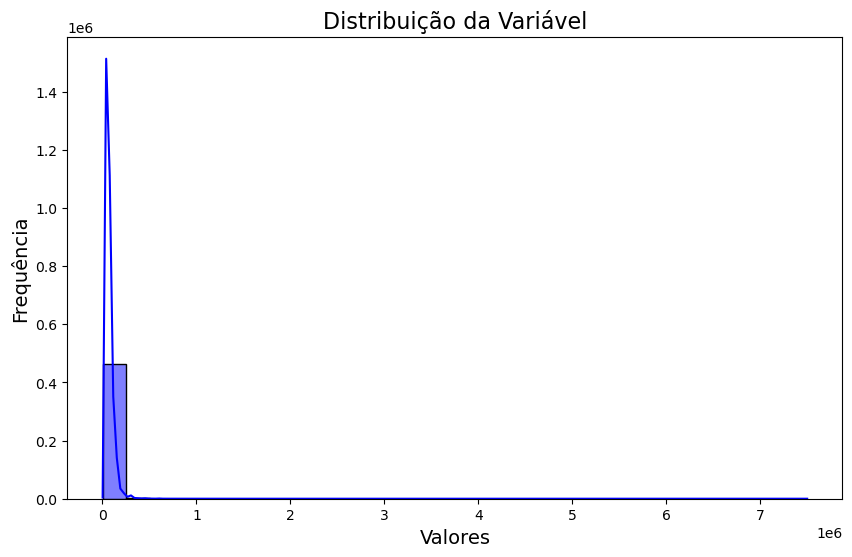

In [35]:
plt.figure(figsize=(10, 6))

# Histograma com KDE (Kernel Density Estimate)
sns.histplot(df['annual_inc'], bins=30, kde=True, color='blue')

# Adicionando título e rótulos
plt.title('Distribuição da Variável', fontsize=16)
plt.xlabel('Valores', fontsize=14)
plt.ylabel('Frequência', fontsize=14)

# Exibir o gráfico
plt.show()

In [36]:
df['annual_inc'].fillna(df['annual_inc'].mean(), inplace=True)
df['mths_since_earliest_cr_line'].fillna(0, inplace=True)
df['total_acc'].fillna(0, inplace=True)
df['pub_rec'].fillna(0, inplace=True)
df['open_acc'].fillna(0, inplace=True)
df['inq_last_6mths'].fillna(0, inplace=True)
df['delinq_2yrs'].fillna(0, inplace=True)
df['emp_length_int'].fillna(0, inplace=True)


## PD Model - Data Preparation

In [37]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [39]:
df['good_bad'] = np.where(df['loan_status'].isin(['Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off','Late (31-120 days)']), 0, 1)

In [40]:
df['good_bad']

0         1
1         0
2         1
3         1
4         1
         ..
466280    1
466281    0
466282    1
466283    1
466284    1
Name: good_bad, Length: 466285, dtype: int64

In [48]:
pd.options.display.max_columns = None
